# Import Dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'film.csv'
data_film = pd.read_csv(data_path)
data_film

,title,year,genre,users_rating,votes,languages,directors,runtime
0,#FriendButMarried 2,2020,Biography,6.5,120,Indonesian,Rako Prijanto,100 min
1,4 Mantan,2020,Thriller,6.4,8,Indonesian,Hanny Saputra,80 min
2,Aku Tahu Kapan Kamu Mati,2020,Horror,5.4,17,Indonesian,Hadrah Daeng Ratu,92 min
3,Anak Garuda,2020,Adventure,9.1,27,Indonesian,Faozan Rizal,129 min
4,Dignitate,2020,Drama,7.6,33,Indonesian,Fajar Nugros,109 min
...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,Drama,6.4,30,Indonesian,D. Djajakusuma,97 min
1268,Enam Djam di Djogja,1951,Drama,6.3,9,Indonesian,Usmar Ismail,116 min
1269,Darah dan Doa,1950,Drama,6.6,27,Indonesian,Usmar Ismail,150 min
1270,Resia Boroboedoer,1928,Adventure,7.0,8,Indonesian,NaN,NaN


# Pembersihan data

Melihat Semua kolom yang ada pada dataset

In [62]:
for i in data_film.columns:
  print(i)

title
year
genre
users_rating
votes
languages
directors
runtime


Mencari kolom-kolom yang mengandung nilai NaN

In [63]:
is_na = data_film.isna().any(axis=0)
is_na

title           False
year            False
genre            True
users_rating    False
votes           False
languages       False
directors        True
runtime          True
dtype: bool

Menghapus baris data yang tidak akan digunakan

In [64]:
is_na = data_film.isna().any(axis=1)
is_na
data_film.loc[is_na]

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,NaN
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,NaN
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,NaN
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,NaN
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,NaN
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,NaN,NaN
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,NaN
1258,Malin Kundang,1971,NaN,7.1,7,Indonesian,D. Djajakusuma,NaN
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,NaN


Mengganti nilai NaN pada dataset menggunakan nilai setelahnya

In [65]:
print(data_film)
is_na = data_film[data_film.isnull().any(axis=1)].index
replaced_data_film  = data_film.fillna(method='bfill')
print(replaced_data_film.iloc[is_na]) 

                         title  year      genre  users_rating votes  \
0          #FriendButMarried 2  2020  Biography           6.5   120   
1                     4 Mantan  2020   Thriller           6.4     8   
2     Aku Tahu Kapan Kamu Mati  2020     Horror           5.4    17   
3                  Anak Garuda  2020  Adventure           9.1    27   
4                    Dignitate  2020      Drama           7.6    33   
...                        ...   ...        ...           ...   ...   
1267     The Tiger from Tjampa  1953      Drama           6.4    30   
1268       Enam Djam di Djogja  1951      Drama           6.3     9   
1269             Darah dan Doa  1950      Drama           6.6    27   
1270         Resia Boroboedoer  1928  Adventure           7.0     8   
1271        Loetoeng Kasaroeng  1926    Fantasy           7.2    11   

       languages          directors  runtime  
0     Indonesian      Rako Prijanto  100 min  
1     Indonesian      Hanny Saputra   80 min  
2     

Sehingga, setelah di hapus menggunakan metode **bfill** maka akan di dapatkan data baru sebagai berikut.

In [66]:
new_data = replaced_data_film.iloc[is_na]
new_data

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,112 min
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,108 min
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,86 min
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,90 min
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,94 min
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,Sjuman Djaya,110 min
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,110 min
1258,Malin Kundang,1971,Drama,7.1,7,Indonesian,D. Djajakusuma,117 min
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,152 min


Langkah terakhir, adalah **Menghapus Data Duplicate.** Menggunakan method bawaan dari pandas .drop_duplicates

In [67]:
data_film_duplicated_free = new_data.drop_duplicates()

In [68]:
data_film_duplicated_free

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,112 min
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,108 min
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,86 min
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,90 min
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,94 min
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,Sjuman Djaya,110 min
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,110 min
1258,Malin Kundang,1971,Drama,7.1,7,Indonesian,D. Djajakusuma,117 min
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,152 min


Mengganti data yang mentah menjadi data yang sudah di proses

In [69]:
data_film.loc[is_na] = data_film_duplicated_free.loc[is_na]

Pengecekan data null apakah sudah terhapus semua

In [70]:
is_na = data_film.isna().any(axis=0)
is_na

title           False
year            False
genre           False
users_rating    False
votes           False
languages       False
directors       False
runtime         False
dtype: bool

# Analisis Statistik

Mencari mean dari dataset

In [71]:
data_film.mean()

<ipython-input-71-791a452ba77c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film.mean()


year            2007.023585
users_rating       6.144418
dtype: float64

Mencari median atau nilai tengah dari data set

In [72]:
data_film.median()

<ipython-input-72-d6b68fa2e8fb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film.median()


year            2011.0
users_rating       6.4
dtype: float64

Mencari modus

In [90]:
data_film.mode()

,title,year,genre,users_rating,votes,languages,directors,runtime
0,Jomblo,2019.0,5.0,7.2,11,Indonesian,Nayato Fio Nuala,90 min
1,Kuntilanak 2,NaN,NaN,NaN,7,NaN,NaN,NaN
2,Surat Kecil Untuk Tuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mencari Varian

In [74]:
data_film.var()

<ipython-input-74-3be4c907be43>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film.var()


year            168.183550
users_rating      1.930197
dtype: float64

Mencari Standar Deviasi

In [75]:
data_film.std()

<ipython-input-75-330ccb52e74e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film.std()


year            12.968560
users_rating     1.389315
dtype: float64

Mencari Describe 

In [76]:
data_film.describe()

,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


# Mendeteksi Outlier

Mencari q1 dan q3

In [77]:
q1user_rating = np. percentile(data_film.users_rating,25)
q3user_rating = np. percentile(data_film.users_rating,75)
print('Q1 user_rating :',q1user_rating)
print('Q3 user_rating :',q3user_rating)

IQRuser_rating = q3user_rating - q1user_rating
print('IQR User Rating : ', IQRuser_rating)

Q1 user_rating : 5.3
Q3 user_rating : 7.1
IQR User Rating :  1.7999999999999998


Mencari lower bound dan upper bound

In [78]:
lowerBoundUserRating = q1user_rating - 1.5 * IQRuser_rating
upperBoundUserRating = q3user_rating + 1.5 * IQRuser_rating

print('LowerBound User Rating : ',lowerBoundUserRating)
print('UpperBound User Rating : ',upperBoundUserRating)

LowerBound User Rating :  2.6
UpperBound User Rating :  9.799999999999999


Mendetksi outlier

In [79]:
nilai_min_userRating = np.min(data_film.users_rating)

nilai_max_userRating = np.max(data_film.users_rating)


print('Nilai minimum user rating = ', nilai_min_userRating)
print('Nilai maksimum user rating = ', nilai_max_userRating)

if (nilai_min_userRating < lowerBoundUserRating):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_userRating > upperBoundUserRating):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Nilai minimum user rating =  1.2
Nilai maksimum user rating =  9.4
Ditemukan low outlier!
Tidak ditemukan high outlier!


Melihat Outlier Rating

In [80]:
low_out_rating = []
high_out_rating = []

print(lowerBoundUserRating)
for i in data_film.users_rating:
    if (i < lowerBoundUserRating):
        low_out_rating.append(i)
    if (i > upperBoundUserRating):
        high_out_rating.append(i)

print('Low outlier user rating: ', low_out_rating)
print('High outlier user rating: ', high_out_rating)

2.6
Low outlier user rating:  [2.0, 1.2, 2.4, 1.4, 1.6, 2.2, 1.7, 2.4, 2.3, 2.4, 2.5, 1.8, 2.5, 1.9, 2.5, 2.2, 1.4, 1.5, 1.7, 2.2, 2.4]
High outlier user rating:  []


Mereplace outlier

In [81]:
data_film.users_rating = np.where(data_film.users_rating < lowerBoundUserRating,
                                          data_film.users_rating.mean(),
                                          data_film.users_rating)

Mengecek outlier kembali

In [82]:
nilai_min_userRating = np.min(data_film.users_rating)
nilai_max_userRating = np.max(data_film.users_rating)

if (nilai_min_userRating < lowerBoundUserRating):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_userRating > upperBoundUserRating):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Tidak ditemukan high outlier!


# Visualisasi Data

1. Visualisasi genre

In [83]:
data_film = data_film.loc[data_film.year >= 2000]
data_film

,title,year,genre,users_rating,votes,languages,directors,runtime
0,#FriendButMarried 2,2020,Biography,6.5,120,Indonesian,Rako Prijanto,100 min
1,4 Mantan,2020,Thriller,6.4,8,Indonesian,Hanny Saputra,80 min
2,Aku Tahu Kapan Kamu Mati,2020,Horror,5.4,17,Indonesian,Hadrah Daeng Ratu,92 min
3,Anak Garuda,2020,Adventure,9.1,27,Indonesian,Faozan Rizal,129 min
4,Dignitate,2020,Drama,7.6,33,Indonesian,Fajar Nugros,109 min
...,...,...,...,...,...,...,...,...
1013,Tragedi,2001,Action,4.1,7,Indonesian,Rudy Soedjarwo,120 min
1014,Viva Indonesia,2001,Adventure,7.2,8,Indonesian,Ravi L. Bharwani,90 min
1015,Petualangan Sherina,2000,Adventure,7.8,640,Indonesian,Riri Riza,112 min
1016,Reinkarnasi,2000,Action,6.3,6,Indonesian,Dede Yusuf,82 min


Mengubah value kolom genre menjadi int

In [84]:
code = 1
for i in data_film.loc[:,'genre'].unique():
  data_film['genre'].loc[data_film['genre']==i] = code
  code += 1
data_film['genre'] = data_film['genre'].astype('int64')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-84-992714c0246c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_film['genre'] = data_film['genre'].astype('int64')


In [85]:
data_film

,title,year,genre,users_rating,votes,languages,directors,runtime
0,#FriendButMarried 2,2020,1,6.5,120,Indonesian,Rako Prijanto,100 min
1,4 Mantan,2020,2,6.4,8,Indonesian,Hanny Saputra,80 min
2,Aku Tahu Kapan Kamu Mati,2020,3,5.4,17,Indonesian,Hadrah Daeng Ratu,92 min
3,Anak Garuda,2020,4,9.1,27,Indonesian,Faozan Rizal,129 min
4,Dignitate,2020,5,7.6,33,Indonesian,Fajar Nugros,109 min
...,...,...,...,...,...,...,...,...
1013,Tragedi,2001,8,4.1,7,Indonesian,Rudy Soedjarwo,120 min
1014,Viva Indonesia,2001,4,7.2,8,Indonesian,Ravi L. Bharwani,90 min
1015,Petualangan Sherina,2000,4,7.8,640,Indonesian,Riri Riza,112 min
1016,Reinkarnasi,2000,8,6.3,6,Indonesian,Dede Yusuf,82 min


Jumlah film berdasarkan genre

In [86]:
JumlahGenre = data_film.groupby('genre')['users_rating'].count()
JumlahGenre

genre
1      28
2      11
3     205
4      41
5     383
6     250
7       4
8      75
9       1
10      7
11      9
12      2
13      2
Name: users_rating, dtype: int64

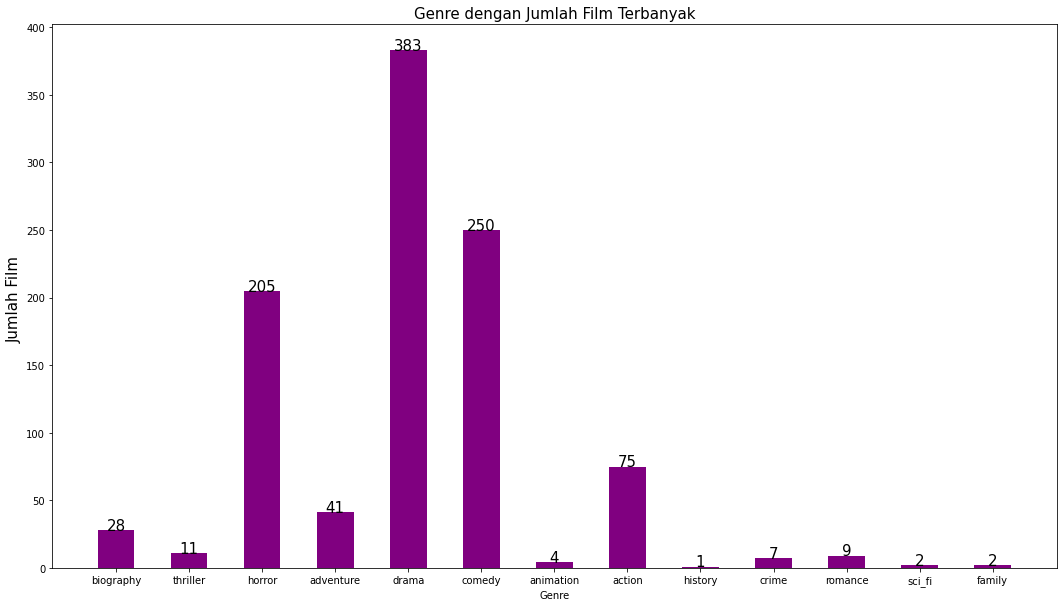

In [87]:
menJumlah = ( 28, 11,205, 41, 383, 250, 4, 75, 1, 7, 9, 2, 2) 
biography = JumlahGenre[1]
thriller = JumlahGenre[2]
horror	= JumlahGenre[3]
adventure = JumlahGenre[4]
drama = JumlahGenre[5]
comedy = JumlahGenre[6]
animation = JumlahGenre[7]
action = JumlahGenre[8]
history = JumlahGenre[9]
crime = JumlahGenre[10]
romance = JumlahGenre[11]
sci_fi = JumlahGenre[12]
family = JumlahGenre[13]
data_dict = {'biography':biography,'thriller':thriller,'horror':horror,'adventure':adventure,'drama':drama,'comedy':comedy,'animation':animation,
             'action':action,'history':history,'crime':crime,'romance':romance,'sci_fi':sci_fi,'family':family}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig, ax = plt.subplots(figsize = (18,10))
for index,data in enumerate(menJumlah):
    plt.text(x=index , y =data+0.1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')

#  Bar plot
plt.bar(courses, values, color ='Purple', width = 0.5)
plt.xlabel("Genre")
plt.ylabel("Jumlah Film ", fontsize=15)
plt.title("Genre dengan Jumlah Film Terbanyak", fontsize=15)
plt.show()

Rata rata rating tiap genre

In [88]:
rata_rata = data_film.groupby('genre')['users_rating'].mean()
rata_rata

genre
1     7.346429
2     6.027273
3     5.143739
4     6.547425
5     6.740064
6     5.852221
7     5.825000
8     6.308443
9     7.500000
10    6.042857
11    6.938269
12    5.800000
13    7.100000
Name: users_rating, dtype: float64

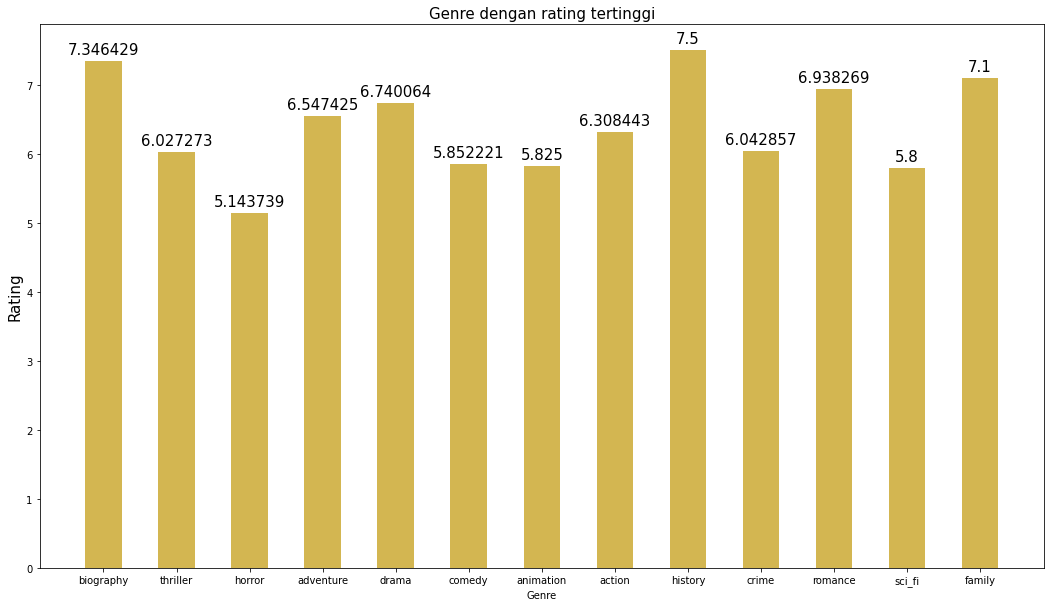

In [89]:
menMeans = (7.346429, 6.027273, 5.143739, 6.547425, 6.740064, 5.852221, 5.825000, 6.308443, 7.500000, 6.042857, 6.938269, 5.800000, 7.100000) 
biography = rata_rata[1]
thriller = rata_rata[2]
horror	= rata_rata[3]
adventure = rata_rata[4]
drama = rata_rata[5]
comedy = rata_rata[6]
animation = rata_rata[7]
action = rata_rata[8]
history = rata_rata[9]
crime = rata_rata[10]
romance = rata_rata[11]
sci_fi = rata_rata[12]
family = rata_rata[13]
data_dict = {'biography':biography,'thriller':thriller,'horror':horror,'adventure':adventure,'drama':drama,'comedy':comedy,'animation':animation,
             'action':action,'history':history,'crime':crime,'romance':romance,'sci_fi':sci_fi,'family':family}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig, ax = plt.subplots(figsize = (18,10))
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+0.1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')

#  Bar plot
plt.bar(courses, values, color ='#D3B651', width = 0.5)
plt.xlabel("Genre")
plt.ylabel("Rating", fontsize=15)
plt.title("Genre dengan rating tertinggi", fontsize=15)
plt.show()